In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [153]:
import numpy as np

In [2]:
bew = pd.read_csv('BEV337OD3371.csv')

https://data.stadt-zuerich.ch/dataset/bev_bestand_jahr_nationalitaet_aufenthaltsart_geschl_od3371/resource/34233efc-8db9-402a-a47d-f3d26da5693d 
https://data.stadt-zuerich.ch/dataset/bev_bestand_jahr_nationalitaet_aufenthaltsart_geschl_od3371 


In [7]:
bew.iloc[0]

StichtagDatJahr                   1993
AufArt2CdAgg                         1
AufArt2LangAgg     Niedergelassene (C)
SexCd                                1
SexLang                       männlich
NationHistCd                      8201
NationHistLang                Albanien
RegionCd                            17
RegionLang                Südosteuropa
KontinentCd                          1
KontinentLang                   Europa
AnzBestWir                           1
Name: 0, dtype: object

<AxesSubplot:xlabel='StichtagDatJahr'>

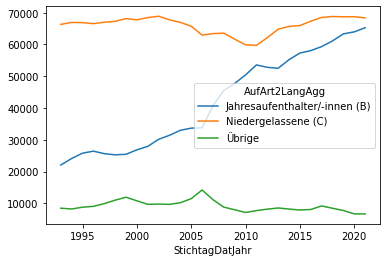

In [9]:
bew.groupby(['StichtagDatJahr', 'AufArt2LangAgg'])['AnzBestWir'].sum().unstack().plot()

___

https://data.stadt-zuerich.ch/dataset/bev_bestand_jahr_quartier_alter_herkunft_geschlecht_od3903 

In [10]:
dem = pd.read_csv('BEV390OD3903.csv')

<AxesSubplot:xlabel='StichtagDatJahr'>

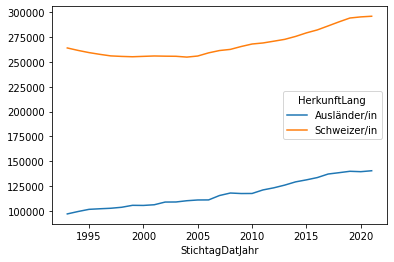

In [13]:
dem.groupby(['StichtagDatJahr', 'HerkunftLang'])['AnzBestWir'].sum().unstack().plot()

<AxesSubplot:xlabel='AlterVCd'>

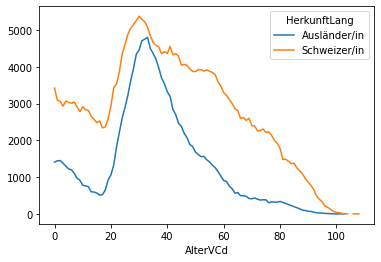

In [33]:
dem.query('StichtagDatJahr==2021')\
.groupby(['AlterVCd','HerkunftLang'])['AnzBestWir'].sum().unstack()\
.plot()

<AxesSubplot:xlabel='AlterVCd'>

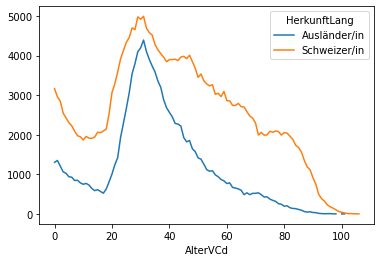

In [37]:
dem.query('StichtagDatJahr==2011')\
.groupby(['AlterVCd','HerkunftLang'])['AnzBestWir'].sum().unstack()\
.plot()

<AxesSubplot:xlabel='StichtagDatJahr'>

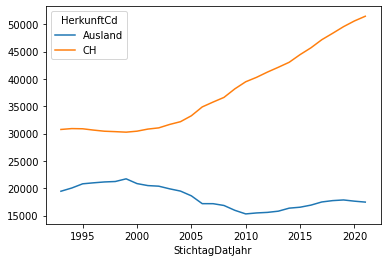

In [125]:
dem[(dem['AlterVKurz']<18)]\
.groupby([dem['StichtagDatJahr'], 
             dem['HerkunftCd'].replace({1: 'CH', 2: 'Ausland'}),
            ])['AnzBestWir'].sum().unstack()\
.plot()

<AxesSubplot:xlabel='StichtagDatJahr'>

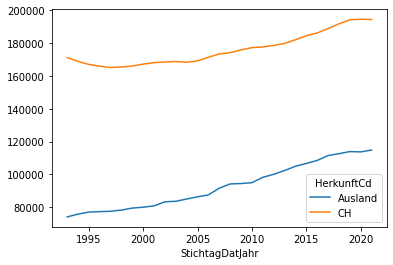

In [120]:
dem[(dem['AlterVKurz']>=18) & (dem['AlterVKurz']<=65)]\
.groupby([dem['StichtagDatJahr'], 
             dem['HerkunftCd'].replace({1: 'CH', 2: 'Ausland'}),
            ])['AnzBestWir'].sum().unstack()\
.plot()

<AxesSubplot:xlabel='StichtagDatJahr'>

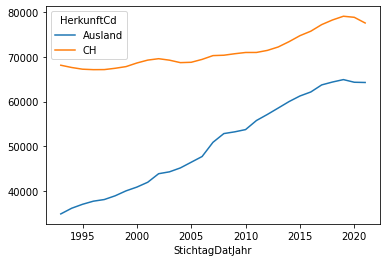

In [124]:
dem[(dem['AlterVKurz']>=25) & (dem['AlterVKurz']<=40)]\
.groupby([dem['StichtagDatJahr'], 
             dem['HerkunftCd'].replace({1: 'CH', 2: 'Ausland'}),
            ])['AnzBestWir'].sum().unstack()\
.plot()

In [44]:
dem.query('StichtagDatJahr==2021')\
.groupby(['HerkunftLang'])['AnzBestWir'].sum()

HerkunftLang
Ausländer/in    140343
Schweizer/in    295989
Name: AnzBestWir, dtype: int64

In [45]:
bew.query('StichtagDatJahr == 2021').groupby([ 'AufArt2LangAgg'])['AnzBestWir'].sum()

AufArt2LangAgg
Jahresaufenthalter/-innen (B)    65286
Niedergelassene (C)              68377
Übrige                            6680
Name: AnzBestWir, dtype: int64

In [46]:
bew.query('StichtagDatJahr == 2021').groupby([ 'AufArt2LangAgg'])['AnzBestWir'].sum().sum()

140343

In [48]:
dem.columns

Index(['StichtagDatJahr', 'QuarSort', 'QuarCd', 'QuarLang', 'AlterVSort',
       'AlterVCd', 'AlterVKurz', 'AlterV05Sort', 'AlterV05Kurz',
       'HerkunftLang', 'HerkunftCd', 'HerkunftSort', 'SexCd', 'SexKurz',
       'AnzBestWir'],
      dtype='object')

In [49]:
dem[['HerkunftLang', 'HerkunftCd']].drop_duplicates()

,HerkunftLang,HerkunftCd
0,Schweizer/in,1
2,Ausländer/in,2


In [51]:
dem.query('StichtagDatJahr==2021')\
.query('AlterVCd in [16,17]')\
.query('HerkunftCd==1')['AnzBestWir'].sum()

4864

In [52]:
dem.query('StichtagDatJahr==2021')\
.query('AlterVCd > 18')\
.query('HerkunftCd==2')['AnzBestWir'].sum()

122224

In [83]:
perc_adult_ausl = \
    (dem.query('StichtagDatJahr==2021')\
    .query('AlterVCd > 18')\
    .query('HerkunftCd==2')['AnzBestWir'].sum()) \
    / \
    (dem.query('StichtagDatJahr==2021')\
     .query('HerkunftCd==2')['AnzBestWir'].sum())

In [85]:
bew_stat = bew.query('StichtagDatJahr == 2021').groupby([ 'AufArt2LangAgg'])['AnzBestWir'].sum()

In [89]:
perc_bewc = bew_stat['Niedergelassene (C)'] / bew_stat.sum()

In [90]:
cnt_bewc = bew_stat['Niedergelassene (C)'] 

In [91]:
# assume C-Bew is equally distributed along the age 
cnt_adult_bewc = cnt_bewc*perc_adult_ausl

In [93]:
# potentially these many votes could be there
cnt_adult_bewc

59549.17913967921

___

https://data.stadt-zuerich.ch/dataset/politik_abstimmungen_seit1933

In [38]:
abst = pd.read_csv('abstimmungen_seit1933.csv')

In [80]:
abst.iloc[0]

Abstimmungs_Datum                                               2022-05-15
Nr_Politische_Ebene                                                      1
Name_Politische_Ebene                                    Eidgenossenschaft
Abstimmungs_Text         Änderung des Bundesgesetzes über Filmproduktio...
Nr_Resultat_Gebiet                                                       1
Name_Resultat_Gebiet                                     Eidgenossenschaft
Nr_Wahlkreis_StZH                                                      NaN
Name_Wahlkreis_StZH                                                    NaN
Stimmberechtigt                                                        NaN
Ja                                                                 1255032
Nein                                                                893369
Stimmbeteiligung (%)                                                  40.0
Ja (%)                                                                58.4
Nein (%)                 

In [40]:
abst['year'] = pd.to_datetime(abst['Abstimmungs_Datum']).dt.year
abst['ja_und_nein'] = abst['Ja']+abst['Nein']
abst['ja_excess'] = (abst['Ja']-abst['Nein'])/2

In [94]:
abst['potential_bewc'] = abst['Stimmbeteiligung (%)']*cnt_adult_bewc/100

In [54]:
abst.query('year == 2021')\
.query('Nr_Politische_Ebene == 3')['Abstimmungs_Text'].unique()

array(['Kommunaler Richtplan Siedlung, Landschaft, öffentliche Bauten und Anlagen',
       'Kommunaler Richtplan Verkehr',
       'Rahmenkredit von 330 Millionen Franken für den Ausbau der Fernwärmeversorgung',
       'Ersatzneubau Wohnsiedlung Hardau I, Objektkredit von 70,714 Millionen Franken',
       'Volksinitiative zum Schutz der Besonnung des öffentlichen Grünraums am Seeufer',
       'Neubau Wache Nord mit zentraler Einsatzlogistik für Schutz & Rettung Zürich',
       'Totalrevision der Gemeindeordnung',
       'Rahmenkredit von 200 Millionen Franken für den Ausbau von erneuerbaren Energien',
       'Ausbau Stadttunnel als Veloverbindung',
       'Einhausung Schwamendingen mit Ueberlandpark',
       'Schulanlage und Quartierpark Areal Thurgauerstrasse',
       'Wohnsiedlung Letzi', 'Schulanlage und Quartierpark Areal Guggach'],
      dtype=object)

In [64]:
abst_text = 'Kommunaler Richtplan Verkehr'

abst.query('year == 2021')\
.query('Nr_Politische_Ebene == 3')\
.query('Abstimmungs_Text == @abst_text').dropna(subset=['Name_Wahlkreis_StZH'])\
[['Stimmberechtigt','Ja','Nein', 'ja_und_nein']].sum()

Stimmberechtigt    234112.0
Ja                  80153.0
Nein                59443.0
ja_und_nein        139596.0
dtype: float64

In [97]:
abst_text = 'Kommunaler Richtplan Verkehr'

abst[abst['Nr_Wahlkreis_StZH'].isnull()]\
.query('year == 2020')\
.query('Nr_Politische_Ebene == 3')\
[['Abstimmungs_Text', 'Stimmbeteiligung (%)','Ja (%)', 'ja_und_nein', 'ja_excess', 'potential_bewc']]

,Abstimmungs_Text,Stimmbeteiligung (%),Ja (%),ja_und_nein,ja_excess,potential_bewc
617,Gegenvorschlag des Gemeinderats zur Volksiniti...,51.9,45.8,116568,-4896.0,30906.023973
627,Öffentlicher Gestaltungsplan Thurgauerstrasse,51.4,59.8,113158,11105.0,30608.278078
637,Neues Fördersystem Tanz und Theater,52.1,68.0,117044,21106.0,31025.122332
647,Volksinitiative «Sichere Velorouten für Zürich»,62.6,70.5,143717,29477.5,37277.786141
657,Privater Gestaltungsplan «Areal Hardturm – Sta...,62.0,59.1,138827,12669.5,36920.491067
667,Neuregelung Finanzkompetenzen für den Erwerb v...,59.9,67.0,130340,22192.0,35669.958305
677,Instandsetzung und Optimierung ewz-Areal Herdern,60.5,88.2,135192,51709.0,36027.253380
687,Bau einer direkten Wasserleitung zwischen Limm...,60.5,92.8,134088,57385.0,36027.253380
697,"Pro Senectute Kanton Zürich, Beiträge ab 2021",60.8,90.8,135242,55199.0,36205.900917
879,Teilersatz Tramdepot Hard mit neuer kommunaler...,49.2,70.9,111822,23423.0,29298.196137


___

### Do this for every year

how many foreign adults per year: 

In [109]:
demstats_herkunft_adult = dem.groupby([dem['StichtagDatJahr'], 
             dem['HerkunftCd'].replace({1: 'CH', 2: 'Ausland'}),
             (dem['AlterVKurz']>=18).replace({False: 'kid', True: 'adult'}),
            ])['AnzBestWir'].sum().unstack()

Text(0.5, 1.0, '# of adults')

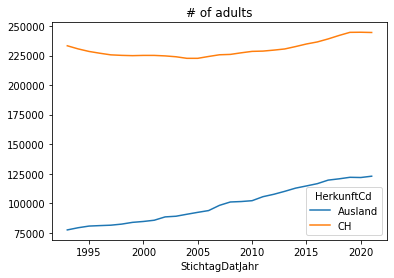

In [117]:
ax = demstats_herkunft_adult.reset_index(level=1).pivot(columns='HerkunftCd', values='adult').plot()
ax.set_title('# of adults')

percentage of C-bewilligung

$$
n_{Aus} = n_{C}+n_{B}+n_{o} \\
n_{Aus} = n_{0-18} + n_{18+}
$$

assume in every age group there is the same perc. of C: 

$$
p_{C} = n_{C}/n_{Aus} \\
n_{C|18+} = p_{C}*n_{18+} = n_{C}/n_{Aus}*n_{18+}
$$

$$
n_{18+|C} = p_{18+}*n_{C} = n_{C}*n_{18+}/n_{Aus}
$$

In [133]:
bew.columns

Index(['StichtagDatJahr', 'AufArt2CdAgg', 'AufArt2LangAgg', 'SexCd', 'SexLang',
       'NationHistCd', 'NationHistLang', 'RegionCd', 'RegionLang',
       'KontinentCd', 'KontinentLang', 'AnzBestWir'],
      dtype='object')

In [136]:
bew[['AufArt2CdAgg','AufArt2LangAgg']].drop_duplicates()

,AufArt2CdAgg,AufArt2LangAgg
0,1,Niedergelassene (C)
234,2,Jahresaufenthalter/-innen (B)
477,3,Übrige


In [139]:
bewstats_bew = bew.groupby(['StichtagDatJahr', 'AufArt2CdAgg'])['AnzBestWir'].sum().unstack()\
.rename(columns={1: 'bew_c', 2: 'bew_b', 3: 'bew_other'})

In [175]:
ausl_stats = pd.concat([demstats_herkunft_adult.reset_index(level=1).query('HerkunftCd == "Ausland"'), bewstats_bew], axis=1)
ausl_stats= ausl_stats.drop(columns=['HerkunftCd'])
ausl_stats['adult_bew_c_approx'] = np.round(ausl_stats['adult'] / (ausl_stats['adult']+ausl_stats['kid']) * ausl_stats['bew_c'])
ausl_stats['adult_bew_b_approx'] = np.round(ausl_stats['adult'] / (ausl_stats['adult']+ausl_stats['kid']) * ausl_stats['bew_b'])
ausl_stats.loc[2022] = ausl_stats.loc[2021]
ausl_stats = ausl_stats.reset_index().rename(columns={'StichtagDatJahr':'year'})

In [177]:
abst_recent = abst[abst['year']>=1993].copy()
abst_recent = abst_recent.drop(columns=['potential_bewc'])

abst_sel = abst_recent[(abst_recent['Nr_Resultat_Gebiet']==3) & abst_recent['Nr_Wahlkreis_StZH'].isnull()]

In [179]:
abst_sel_bew = abst_sel.merge(ausl_stats[['year','adult_bew_c_approx','adult_bew_b_approx']], 
              on="year", how="left")

In [181]:
abst_sel_bew['ja_bew_c'] = abst_sel_bew['Ja'] + abst_sel_bew['adult_bew_c_approx']
abst_sel_bew['nein_bew_c'] = abst_sel_bew['Nein'] + abst_sel_bew['adult_bew_c_approx']

In [185]:
abst_sel_bew['ja_perc_bew_c_ja'] = abst_sel_bew['ja_bew_c']/(abst_sel_bew['ja_bew_c']+abst_sel_bew['Nein'])*100
abst_sel_bew['ja_perc_bew_c_nein'] = abst_sel_bew['Ja']/(abst_sel_bew['Ja']+abst_sel_bew['nein_bew_c'])*100

In [186]:
abst_sel_bew.iloc[0]

Abstimmungs_Datum                                               2022-05-15
Nr_Politische_Ebene                                                      1
Name_Politische_Ebene                                    Eidgenossenschaft
Abstimmungs_Text         Änderung des Bundesgesetzes über Filmproduktio...
Nr_Resultat_Gebiet                                                       3
Name_Resultat_Gebiet                                          Stadt Zürich
Nr_Wahlkreis_StZH                                                      NaN
Name_Wahlkreis_StZH                                                    NaN
Stimmberechtigt                                                   267001.0
Ja                                                                   77633
Nein                                                                 39103
Stimmbeteiligung (%)                                                  45.1
Ja (%)                                                                66.5
Nein (%)                 

In [190]:
(abst_sel_bew['adult_bew_c_approx']/abst_sel_bew['ja_und_nein']).describe()

count    856.000000
mean       1.289508
std       19.114999
min        0.348255
25%        0.529816
50%        0.603677
75%        0.707482
max      559.870000
dtype: float64

In [191]:
import seaborn as sns

(0.0, 1.5)

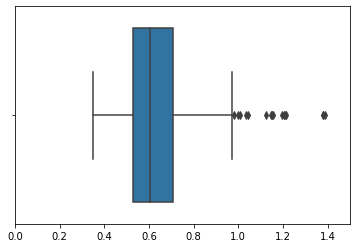

In [194]:
ax = sns.boxplot(x=(abst_sel_bew['adult_bew_c_approx']/abst_sel_bew['ja_und_nein']))
ax.set_xlim(0,1.5)

https://www.dsj.ch/themen/stimmrechtsalter-16/